# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [7]:
train_url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv'
test_url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv'

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
print(train.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [13]:
print(test.isna().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [14]:
train.shape

(614, 13)

In [15]:
test_y = train['Loan_Status']
train = train.drop(['Loan_Status', 'Loan_ID'], axis=1)

In [16]:
cat_train = train[['Gender', 'Dependents','Married', 'Self_Employed', 'Education', 'Property_Area']]

cat_test = test[['Gender', 'Dependents', 'Married', 'Self_Employed', 'Education', 'Property_Area']]

In [17]:
print(cat_test.columns)

Index(['Gender', 'Dependents', 'Married', 'Self_Employed', 'Education',
       'Property_Area'],
      dtype='object')


In [18]:
print(cat_train.columns)

Index(['Gender', 'Dependents', 'Married', 'Self_Employed', 'Education',
       'Property_Area'],
      dtype='object')


In [19]:
num_test = test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
num_train = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

In [20]:
test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [23]:
cat_test['Gender'].fillna('Male', inplace=True)
cat_train['Gender'].fillna('Male', inplace=True)
cat_test.Gender.value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [22]:
cat_test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [24]:
cat_test['Self_Employed'].fillna('No', inplace=True)
cat_train['Self_Employed'].fillna('No', inplace=True)
cat_test.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [25]:
cat_test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [26]:
cat_train['Dependents'].fillna("0", inplace=True)
cat_test['Dependents'].fillna("0", inplace=True)
cat_test.Dependents.value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [27]:
cat_test.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [28]:
cat_train['Married'].fillna("Yes", inplace=True)
cat_test['Married'].fillna("Yes", inplace=True)
cat_test.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [29]:
cat_test.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [30]:
cat_train['Self_Employed'].fillna("No", inplace=True)
cat_test['Self_Employed'].fillna("No", inplace=True)
cat_test.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

<AxesSubplot:>

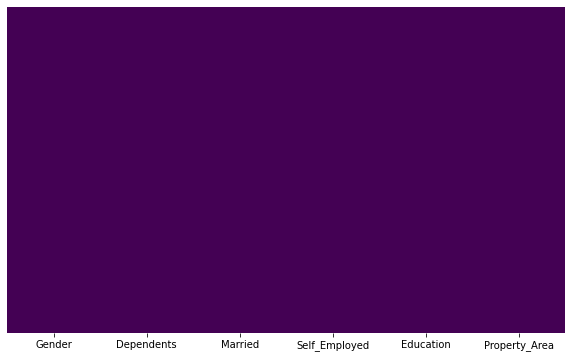

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

<AxesSubplot:>

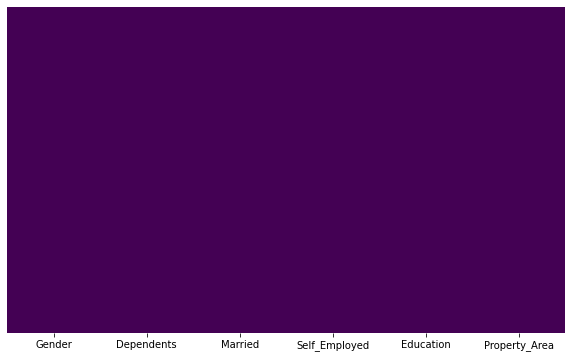

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_test.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [33]:
print(num_train.isna().sum())

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64


In [34]:
print(num_test.isna().sum())

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
dtype: int64


In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy='mean')

In [37]:
imputer.fit(num_test)

SimpleImputer()

In [38]:
num_test_transform = imputer.transform(num_test)

In [39]:
imputer.fit(num_train)

SimpleImputer()

In [40]:
num_train_transform = imputer.transform(num_train)

In [41]:
num_test = pd.DataFrame(data=num_test_transform)
num_test.columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
num_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720.0,0.0,110.0,360.0,1.000000
1,3076.0,1500.0,126.0,360.0,1.000000
2,5000.0,1800.0,208.0,360.0,1.000000
3,2340.0,2546.0,100.0,360.0,0.825444
4,3276.0,0.0,78.0,360.0,1.000000
...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.000000
363,4158.0,709.0,115.0,360.0,1.000000
364,3250.0,1993.0,126.0,360.0,0.825444
365,5000.0,2393.0,158.0,360.0,1.000000


In [42]:
num_train = pd.DataFrame(data=num_train_transform)
num_train.columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
num_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,180.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder = LabelEncoder()

In [45]:
def clean_dep(x):
    return x[0]

In [46]:
print(cat_test.isna().sum())

Gender           0
Dependents       0
Married          0
Self_Employed    0
Education        0
Property_Area    0
dtype: int64


In [47]:
cat_train['Gender']= label_encoder.fit_transform(cat_train['Gender'])
cat_train['Married']= label_encoder.fit_transform(cat_train['Married'])
cat_train['Self_Employed']= label_encoder.fit_transform(cat_train['Self_Employed'])
cat_train['Education']= label_encoder.fit_transform(cat_train['Education']) 
cat_train['Property_Area']= label_encoder.fit_transform(cat_train['Education']) 
cat_train['Dependents']= label_encoder.fit_transform(cat_train['Dependents'])
cat_train

C:\Users\Mike\AppData\Local\Temp/ipykernel_2008/1268319146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train['Gender']= label_encoder.fit_transform(cat_train['Gender'])
C:\Users\Mike\AppData\Local\Temp/ipykernel_2008/1268319146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train['Married']= label_encoder.fit_transform(cat_train['Married'])
C:\Users\Mike\AppData\Local\Temp/ipykernel_2008/1268319146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Gender,Dependents,Married,Self_Employed,Education,Property_Area
0,1,0,0,0,0,0
1,1,1,1,0,0,0
2,1,0,1,1,0,0
3,1,0,1,0,1,1
4,1,0,0,0,0,0
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,3,1,0,0,0
611,1,1,1,0,0,0
612,1,2,1,0,0,0


<AxesSubplot:>

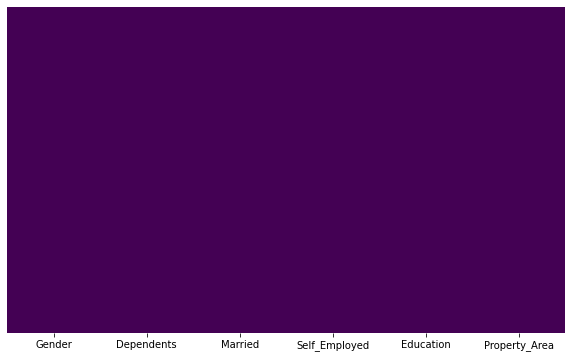

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [49]:
cat_test['Gender']= label_encoder.fit_transform(cat_test['Gender'])
cat_test['Married']= label_encoder.fit_transform(cat_test['Married'])
cat_test['Self_Employed']= label_encoder.fit_transform(cat_test['Self_Employed'])
cat_test['Education']= label_encoder.fit_transform(cat_test['Education']) 
cat_test['Property_Area']= label_encoder.fit_transform(cat_test['Education']) 
cat_test['Dependents']= label_encoder.fit_transform(cat_test['Dependents'])
cat_test

C:\Users\Mike\AppData\Local\Temp/ipykernel_2008/64330034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test['Gender']= label_encoder.fit_transform(cat_test['Gender'])
C:\Users\Mike\AppData\Local\Temp/ipykernel_2008/64330034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test['Married']= label_encoder.fit_transform(cat_test['Married'])
C:\Users\Mike\AppData\Local\Temp/ipykernel_2008/64330034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Gender,Dependents,Married,Self_Employed,Education,Property_Area
0,1,0,1,0,0,0
1,1,1,1,0,0,0
2,1,2,1,0,0,0
3,1,2,1,0,0,0
4,1,0,0,0,1,1
...,...,...,...,...,...,...
362,1,3,1,1,1,1
363,1,0,1,0,0,0
364,1,0,0,0,0,0
365,1,0,1,0,0,0


<AxesSubplot:>

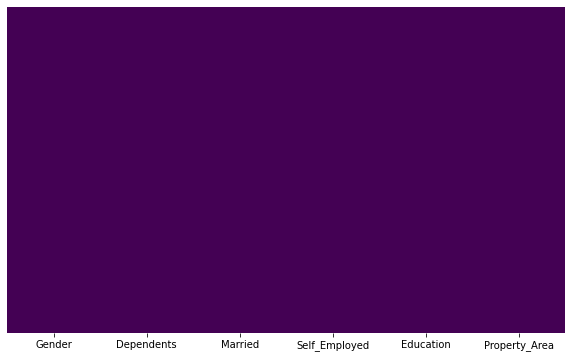

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_test.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [51]:
test_y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [52]:
test_y= label_encoder.fit_transform(test_y)

In [53]:
test_label = pd.DataFrame(test_y, columns=['Loan_Status'])

In [54]:
test_label.value_counts()

Loan_Status
1              422
0              192
dtype: int64

In [55]:
df_test = pd.concat([cat_test, num_test], axis=1)
df_train = pd.concat([cat_train, num_train], axis=1)

In [56]:
df_test.head()

,Gender,Dependents,Married,Self_Employed,Education,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,1,0,0,0,5720.0,0.0,110.0,360.0,1.000000
1,1,1,1,0,0,0,3076.0,1500.0,126.0,360.0,1.000000
2,1,2,1,0,0,0,5000.0,1800.0,208.0,360.0,1.000000
3,1,2,1,0,0,0,2340.0,2546.0,100.0,360.0,0.825444
4,1,0,0,0,1,1,3276.0,0.0,78.0,360.0,1.000000


<AxesSubplot:>

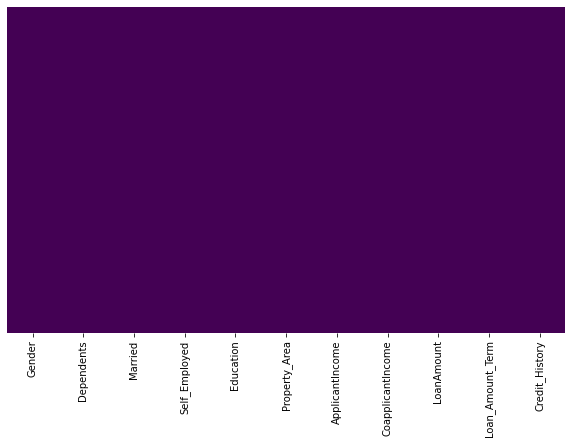

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df_test.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [1]:
############################# Model Building ##############################

In [81]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 
from pprint import pprint
from sklearn.pipeline import Pipeline

In [76]:
x_tn, x_val, y_tn, y_val = train_test_split(df_train, 
                                            test_y, 
                                            test_size=0.33, 
                                            random_state=1
)

In [88]:
# Created differing hyperparameters that were as simple as possible, 
# demonstrating that the method works and can be extrapolated to more time consuming hyperparameters
pipe = Pipeline([("classifier", LogisticRegression())])

search_space = [
                {"classifier": [LogisticRegression()],
                 "classifier__fit_intercept": [True, False]
                 },
                {"classifier": [KNeighborsClassifier()],
                 "classifier__algorithm": ['auto', 'ball']
                 },
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__criterion": ['gini', 'entropy']
                 },
                {"classifier": [SVC()],
                 "classifier__kernel": ['linear', 'rbf']
                 },
                {"classifier": [GaussianNB()],
                 "classifier__var_smoothing": ['1e-9', 1]
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [100, 120]}]

In [91]:
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(x_tn, y_tn)

In [94]:
print(best_model.best_estimator_)

Pipeline(steps=[('classifier', LogisticRegression())])


In [95]:
rfc_random = print("The mean accuracy of the model is:",best_model.score(x_tn, y_tn))

The mean accuracy of the model is: 0.8272506082725061


In [122]:
gridsearch.cv_results_

{'mean_fit_time': array([2.08003998e-02, 1.96008205e-02, 2.40020752e-03, 1.79967880e-03,
        2.19950676e-03, 2.60004997e-03, 4.45598313e+01, 5.99932671e-03,
        1.79939270e-03, 1.99990273e-03, 9.67995644e-02, 1.12199450e-01]),
 'std_fit_time': array([3.48853472e-03, 4.92514674e-03, 4.90426992e-04, 3.99875897e-04,
        3.99542580e-04, 4.89182186e-04, 7.88830169e+00, 1.03375833e-06,
        3.99733742e-04, 3.50402318e-07, 2.03938066e-03, 1.46985343e-03]),
 'mean_score_time': array([0.00120106, 0.00100036, 0.00379958, 0.        , 0.00159912,
        0.00119996, 0.00180106, 0.00240016, 0.        , 0.00100002,
        0.00819969, 0.00940008]),
 'std_score_time': array([4.00352648e-04, 7.13664510e-07, 4.00376331e-04, 0.00000000e+00,
        4.89336890e-04, 3.99589908e-04, 4.00449577e-04, 4.89200787e-04,
        0.00000000e+00, 3.23406696e-07, 3.99828597e-04, 4.90018276e-04]),
 'param_classifier': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    KN

In [131]:
results = gridsearch.cv_results_
model_list = np.array(results['param_classifier'])
model_list = pd.DataFrame(model_list, columns=['Model'])
model_list

,Model
0,LogisticRegression()
1,LogisticRegression()
2,KNeighborsClassifier()
3,KNeighborsClassifier()
4,DecisionTreeClassifier()
5,DecisionTreeClassifier()
6,SVC()
7,SVC()
8,GaussianNB()
9,GaussianNB()


In [142]:
results_list = np.array(results['mean_test_score'])
results_list = pd.DataFrame(results_list, columns=['Score'])
Result = pd.concat([model_list, results_list], axis=1)
Result = Result.sort_values(by='Score',ascending=False)
Result = Result.drop_duplicates(subset='Model', keep='first', inplace=False)
Result

,Model,Score
0,LogisticRegression(),0.827153
11,RandomForestClassifier(),0.819924
6,SVC(),0.795563
5,DecisionTreeClassifier(),0.729797
9,GaussianNB(),0.698296
2,KNeighborsClassifier(),0.666559
